In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(123)  # set the random seed for reproductibility

# create a dataframe with two classes

n_samples = 1000

class_0_ratio = 0.9

n_class_0 = int(n_samples * class_0_ratio)

n_class_1 = n_samples - n_class_0



In [3]:
(n_class_0 , n_class_1)

(900, 100)

In [4]:
# create my dataframe with imbalance dataset

In [5]:
class_0 = pd.DataFrame({
    "feature1" : np.random.normal(loc=0,scale=1,size=n_class_0),
    "feature2" : np.random.normal(loc=0,scale=1,size=n_class_0),
    "target" : [0] * n_class_0
    })

In [6]:
class_0

,feature1,feature2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
895,0.238761,-0.003155,0
896,-1.106386,-0.430660,0
897,0.366732,-0.146416,0
898,1.023906,1.160176,0


In [7]:
class_1 = pd.DataFrame({
    "feature1" : np.random.normal(loc=2,scale=1,size=n_class_1),
    "feature2" : np.random.normal(loc=2,scale=1,size=n_class_1),
    "target" : [1] * n_class_1
})

In [8]:
class_1

,feature1,feature2,target
0,1.699768,2.139033,1
1,1.367739,2.025577,1
2,1.795683,1.803557,1
3,2.213696,3.312255,1
4,3.033878,3.187417,1
...,...,...,...
95,1.376371,2.845701,1
96,2.239810,0.880077,1
97,1.131760,1.640703,1
98,2.902006,0.390305,1


In [9]:
df = pd.concat([class_0 , class_1] ).reset_index(drop=True)

In [10]:
df

,feature1,feature2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1


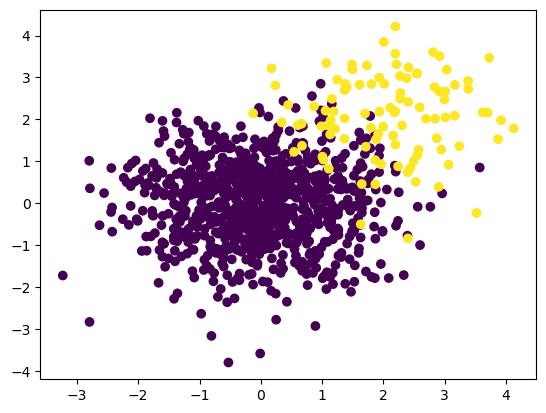

In [12]:
import matplotlib.pyplot as plt

plt.scatter(df.feature1, df.feature2 , c = df.target )

In [17]:
df.head()

,feature1,feature2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [18]:
df.tail()

,feature1,feature2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [19]:
df.value_counts("target")

target
0    900
1    100
dtype: int64

# upsampling

In [20]:
#  creating two data frame w.r.t target

In [21]:
df_minority = df[df["target"] == 1]

In [22]:
df_minority

,feature1,feature2,target
900,1.699768,2.139033,1
901,1.367739,2.025577,1
902,1.795683,1.803557,1
903,2.213696,3.312255,1
904,3.033878,3.187417,1
...,...,...,...
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1


In [23]:
df_majority = df[df["target"] == 0]

In [24]:
df_majority

,feature1,feature2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
895,0.238761,-0.003155,0
896,-1.106386,-0.430660,0
897,0.366732,-0.146416,0
898,1.023906,1.160176,0


In [29]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority , replace=True ,  # sample with replacement
         n_samples = len(df_majority),
         random_state = 42
        )

In [30]:
df_minority_upsampled 

,feature1,feature2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1
...,...,...,...
952,1.188902,2.189189,1
965,3.919526,1.980541,1
976,2.810326,3.604614,1
942,3.621531,2.168229,1


In [34]:
df2

,feature1,feature2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
1795,1.188902,2.189189,1
1796,3.919526,1.980541,1
1797,2.810326,3.604614,1
1798,3.621531,2.168229,1


In [36]:
df2.value_counts("target")

target
0    900
1    900
dtype: int64

# down sampling

In [71]:
# np.random.seed(123)  # set the random seed for reproductibility

# create a dataframe with two classes

n_samples = 1000

class_0_ratio = 0.9

n_class_0 = int(n_samples * class_0_ratio)

n_class_1 = n_samples - n_class_0

In [72]:
(n_class_0 , n_class_1)

(900, 100)

In [73]:
class_0 = pd.DataFrame({
    "feature1" : np.random.normal(loc=0,scale=1,size=n_class_0),
    "feature2" : np.random.normal(loc=0,scale=1,size=n_class_0),
    "target" : [0] * n_class_0
    })

In [74]:
class_0

,feature1,feature2,target
0,-0.471276,0.328462,0
1,1.084072,1.038230,0
2,-0.379223,1.147064,0
3,-0.362274,0.638254,0
4,-0.681071,-1.075766,0
...,...,...,...
895,-0.229982,-1.433189,0
896,-0.533514,-0.370110,0
897,0.060924,-0.284352,0
898,1.041367,0.373888,0


In [75]:
class_1 = pd.DataFrame({
    "feature1" : np.random.normal(loc=2,scale=1,size=n_class_1),
    "feature2" : np.random.normal(loc=2,scale=1,size=n_class_1),
    "target" : [1] * n_class_1
    })

In [76]:
class_1

,feature1,feature2,target
0,1.775921,0.902553,1
1,2.338840,1.058241,1
2,1.728472,3.670939,1
3,3.365531,2.067791,1
4,1.262626,3.630785,1
...,...,...,...
95,2.720690,1.978489,1
96,1.949078,3.709793,1
97,2.709784,3.324917,1
98,1.817689,1.549237,1


In [77]:
df = pd.concat([class_0 , class_1] ).reset_index(drop=True)

In [78]:
df


,feature1,feature2,target
0,-0.471276,0.328462,0
1,1.084072,1.038230,0
2,-0.379223,1.147064,0
3,-0.362274,0.638254,0
4,-0.681071,-1.075766,0
...,...,...,...
995,2.720690,1.978489,1
996,1.949078,3.709793,1
997,2.709784,3.324917,1
998,1.817689,1.549237,1


In [79]:
df.value_counts("target")

target
0    900
1    100
dtype: int64

In [80]:
df_minority = df[df["target"] == 1]

In [81]:
df_majority = df[df["target"] == 0]

In [82]:
df_minority

,feature1,feature2,target
900,1.775921,0.902553,1
901,2.338840,1.058241,1
902,1.728472,3.670939,1
903,3.365531,2.067791,1
904,1.262626,3.630785,1
...,...,...,...
995,2.720690,1.978489,1
996,1.949078,3.709793,1
997,2.709784,3.324917,1
998,1.817689,1.549237,1


In [83]:
df_majority

,feature1,feature2,target
0,-0.471276,0.328462,0
1,1.084072,1.038230,0
2,-0.379223,1.147064,0
3,-0.362274,0.638254,0
4,-0.681071,-1.075766,0
...,...,...,...
895,-0.229982,-1.433189,0
896,-0.533514,-0.370110,0
897,0.060924,-0.284352,0
898,1.041367,0.373888,0


In [84]:
from sklearn.utils import resample
df_majority_downsamplesd = resample(df_majority , replace=False ,  # sample with replacement
         n_samples = len(df_minority),
         random_state = 42
        )

In [85]:
df_majority_downsamplesd

,feature1,feature2,target
70,-1.968149,0.323468,0
827,-0.255966,-1.579172,0
231,0.025049,-0.891623,0
588,2.165832,-0.051151,0
39,-0.860429,-1.089545,0
...,...,...,...
398,-0.414723,0.354360,0
76,-0.342394,-0.158087,0
196,0.655082,0.249274,0
631,-0.612125,1.054153,0


In [86]:
df2 = pd.concat([df_minority , df_majority_downsamplesd]).reset_index(drop=True)

In [87]:
df2

,feature1,feature2,target
0,1.775921,0.902553,1
1,2.338840,1.058241,1
2,1.728472,3.670939,1
3,3.365531,2.067791,1
4,1.262626,3.630785,1
...,...,...,...
195,-0.414723,0.354360,0
196,-0.342394,-0.158087,0
197,0.655082,0.249274,0
198,-0.612125,1.054153,0


In [88]:
df2.value_counts("target")

target
0    100
1    100
dtype: int64